In [1]:
%load_ext autoreload
%autoreload 2

from data_prep import DataPreparation, filtering_data
from lstm import LSTMModelTrainerAttention
from rf import RandomForestTrainer
from lgbm import LightGBMTrainer
from catboost_trainer import CatBoostTrainer
import os
import dill as pickle
import numpy as np
import pandas as pd
from analysis import plot_correlation_heatmap, get_ETO_DEP
from lstm import LSTMModelTrainerAttention, calculate_and_plot_errors#, LSTMModelTrainer

import warnings
warnings.simplefilter(action='ignore')

c:\Users\iLabs_6\anaconda3\envs\texml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
output= r'C:\Users\iLabs_6\Documents\Tex\allwithCBAS'
modelname = 'extended_df_ATOT'

 
with  open(os.path.join(output, modelname), 'rb') as f:  
    extended_df = pickle.load(f)

extended_df['cap_DEP'].fillna(extended_df['cap_DEP'].mean(), inplace=True)
extended_df['cap_DES'].fillna(extended_df['cap_DES'].mean(), inplace=True)
extended_df = extended_df.loc[:, ~extended_df.columns.str.contains('t_to_eobt', case=False)]
extended_df = extended_df.loc[:, ~extended_df.columns.str.contains('t_to_atot', case=False)]
pd.set_option("display.max_columns", None)
X, y, colnames = filtering_data(extended_df, airport ='EHAM', save=True)
X = X.drop(['ADES_EHAM', 'ADESLong', 'ADESLat', 'cbasentry'], axis =1)
X.describe()

output= r'C:\Users\iLabs_6\Documents\Tex\allwithCBAS'
modelname = 'extended_df_ETOT'


with  open(os.path.join(output, modelname), 'rb') as f:  
    extended_real= pickle.load(f)
extended_real = extended_real.loc[:, ~extended_real.columns.str.contains('t_to_eobt', case=False)]
extended_real = extended_real.loc[:, ~extended_real.columns.str.contains('t_to_atot', case=False)]

pd.set_option("display.max_columns", None)
print(f'{extended_real}')
X_r, y_r, colnames = filtering_data(extended_real, airport ='EHAM', save=False)
X_r = X_r.drop(['ADES_EHAM', 'ADESLong', 'ADESLat', 'cbasentry'], axis =1)
# X.fillna(0, inplace=True)
print(f'xxxxx = {X_r}')


modelpath= r"C:\Users\iLabs_6\Documents\Tex\AirTrafficDelays\LSTM_Models"

modelname = 'lstm-9-100-2shift-2718'
# with open(os.path.join(output, modelname), 'wb') as f:  
#     pickle.dump(best_model, f, protocol=pickle.HIGHEST_PROTOCOL)
#     print(f"FlightDataset has been saved successfully. {modelname}")
###
with  open(os.path.join(modelpath, modelname), 'rb') as f:  
    best_model = pickle.load(f)

           distance                ETOT  ADEP  ADES                EOBT  \
0      14437.477905 2024-01-23 06:10:00  LSZH  EHAM 2024-01-23 05:55:00   
1       4949.190326 2024-01-23 16:05:00  EPWA  EHAM 2024-01-23 15:50:00   
2      10210.682956 2024-01-27 08:30:00  ENGM  EHAM 2024-01-27 08:20:00   
3      17013.465682 2024-01-29 05:11:00  EDDS  EHAM 2024-01-29 05:00:00   
4       4949.190326 2024-01-31 16:05:00  EPWA  EHAM 2024-01-31 15:50:00   
...             ...                 ...   ...   ...                 ...   
70709   9085.158293 2024-01-22 15:45:00  EDDF  EHAM 2024-01-22 15:30:00   
70710  12922.196222 2024-01-22 14:30:00  EFHK  EHAM 2024-01-22 14:20:00   
70711   9977.022009 2024-01-22 16:40:00  EIDW  EHAM 2024-01-22 16:20:00   
70712  14982.537341 2024-01-22 14:35:00  EKCH  EHAM 2024-01-22 14:25:00   
70713   4949.190326 2024-01-22 19:30:00  EPWA  EHAM 2024-01-22 19:15:00   

                      ETA    CDMStatus  taxitime event  regulations  \
0     2024-01-23 07:29:00  D

In [23]:
data_prep = DataPreparation()


X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, time_horizons, cbaslabels = data_prep.fit_transform_data(X, y)
X_real, ETOT_horizons, cbaslabels = data_prep.transform_data(X_r)

X_train, X_test, y_train, y_test = data_prep.fit_transform_data(X, y, split_ratio=0.8, mode='rf')


skip=['CBAS', 'cbas', 'eobt', 'atot', 'wspeed', 'wdirec', 'wguts']
time_varying_columns=['atfmdelay_Tmin_-300', 'regulations_Tmin_-300', 'cobt_delay_Tmin_-300', 'eflighttime_Tmin_-300', 'visibility_Tmin_-300', 'ko_Tmin_-300', 'TSATdelay_Tmin_-300', 'TOBTdelay_Tmin_-300', 'etodepdelay_Tmin_-300', 'timetoCBAS_Tmin_-300', 'offblock_Tmin_-300', 'fltstate_SI_Tmin_-300', 'fltstate_FI_Tmin_-300', 'fltstate_other_Tmin_-300', 'modeltyp_ACT_Tmin_-300', 'modeltyp_CAL_Tmin_-300', 'modeltyp_EST_Tmin_-300', 'atfmdelay_Tmin_-295', 'regulations_Tmin_-295', 'cobt_delay_Tmin_-295', 'eflighttime_Tmin_-295', 'visibility_Tmin_-295', 'ko_Tmin_-295', 'TSATdelay_Tmin_-295', 'TOBTdelay_Tmin_-295', 'etodepdelay_Tmin_-295', 'timetoCBAS_Tmin_-295', 'offblock_Tmin_-295', 'fltstate_SI_Tmin_-295', 'fltstate_FI_Tmin_-295', 'fltstate_other_Tmin_-295', 'modeltyp_ACT_Tmin_-295', 'modeltyp_CAL_Tmin_-295', 'modeltyp_EST_Tmin_-295', 'atfmdelay_Tmin_-290', 'regulations_Tmin_-290', 'cobt_delay_Tmin_-290', 'eflighttime_Tmin_-

100%|██████████| 100/100 [01:46<00:00,  1.07s/it]


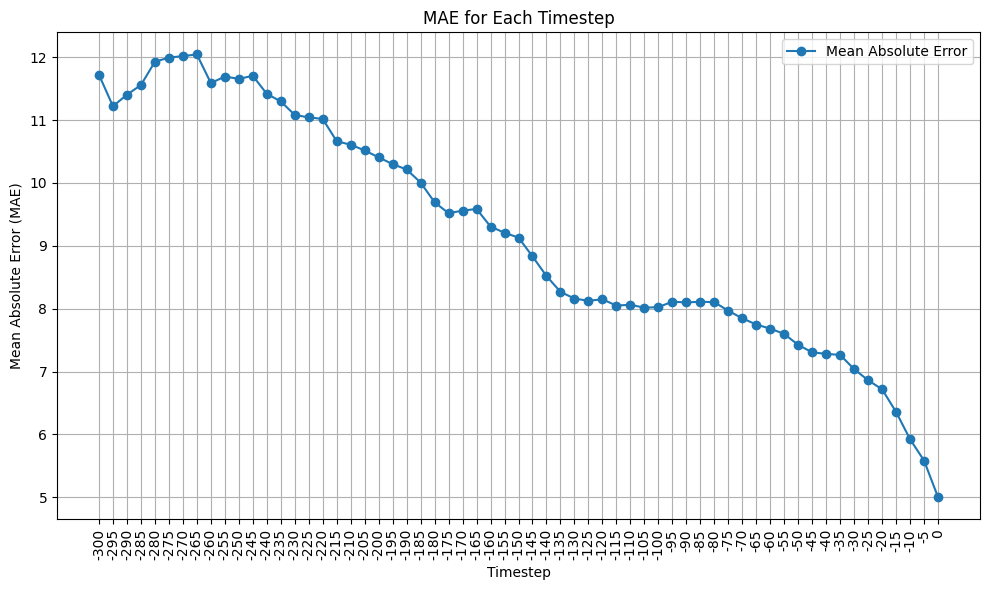

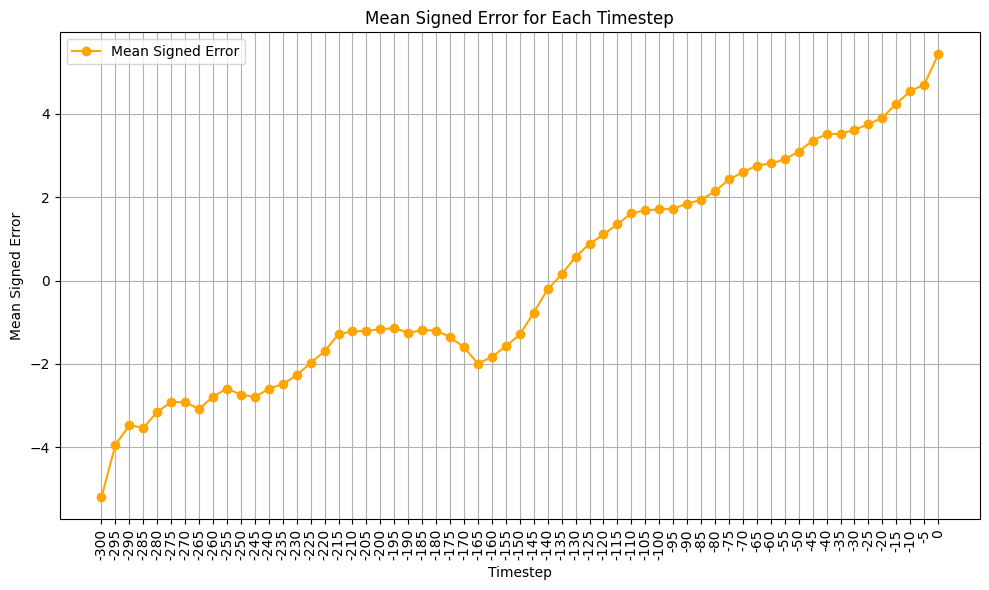

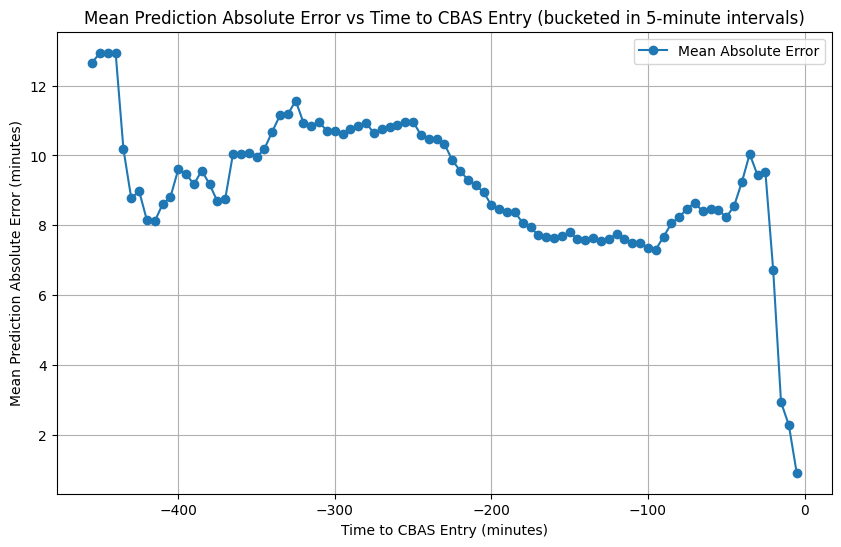

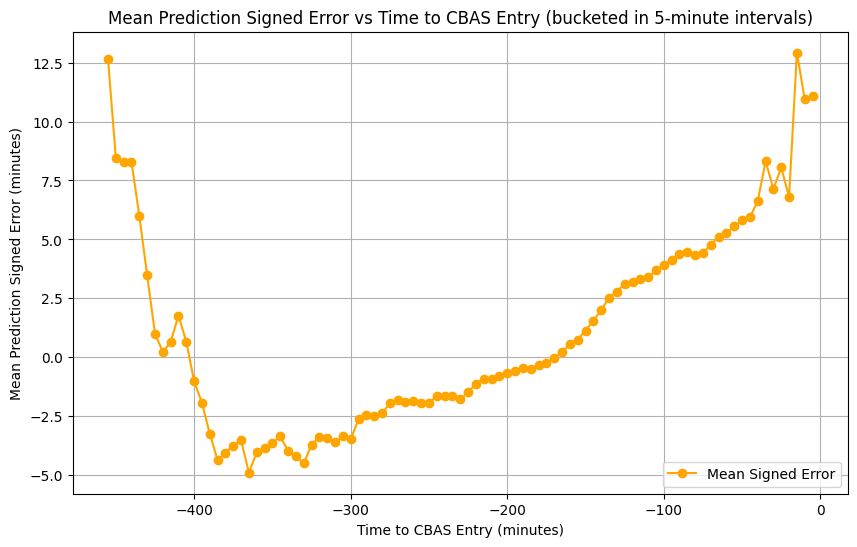

In [24]:


mae_timestep, mae_bucket, mean_signed_errors_by_bucket = calculate_and_plot_errors(y_r, X_real, best_model, data_prep, ETOT_horizons, cbaslabels, start_idx=-1100, end_idx=-1000)

Non-zero indices in y_r: [   18    40    48 ... 70470 70500 70521]
ETOT_horizons: ['-300', '-295', '-290', '-285', '-280', '-275', '-270', '-265', '-260', '-255', '-250', '-245', '-240', '-235', '-230', '-225', '-220', '-215', '-210', '-205', '-200', '-195', '-190', '-185', '-180', '-175', '-170', '-165', '-160', '-155', '-150', '-145', '-140', '-135', '-130', '-125', '-120', '-115', '-110', '-105', '-100', '-95', '-90', '-85', '-80', '-75', '-70', '-65', '-60', '-55', '-50', '-45', '-40', '-35', '-30', '-25', '-20', '-15', '-10', '-5', '0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80', '85', '90', '95', '100', '105', '110', '115', '120']


100%|██████████| 1000/1000 [13:59<00:00,  1.19it/s]

bucketed_errors=defaultdict(<class 'list'>, {135: [0.6772921, 4.7858315, 0.66213727, 5.344486, 0.0066826344, 0.6113415, 11.676204, 3.8128502, 13.505768, 6.04541, 2.6822433, 1.4979048, 25.682055, 3.789571, 10.143054, 5.21432, 1.18853, 5.37636, 5.270378, 3.1571236, 5.6280403, 1.7461834, 2.0175476, 4.457396, 6.784067, 0.54813194, 20.894073, 2.8086166, 4.655387, 16.677721, 1.345083, 0.8357773, 9.611656, 4.4281473, 9.516257, 3.437109, 2.6124706, 13.470432, 17.513748, 3.8893719, 24.286848, 7.875416, 3.5228348, 1.425417, 8.134861, 5.1711655, 25.416574, 25.131338, 9.973207, 13.177071, 12.451981, 17.285093, 9.196762, 2.2232075, 11.229812, 4.4087114, 7.868698, 2.5176144, 22.257473, 0.062059164, 0.49754333, 9.216358, 11.978779, 70.11006, 14.467794, 8.958551, 9.815279, 9.047482, 13.294063, 0.2676401, 11.571617, 5.1761303, 15.794476, 18.276485, 0.042165756, 12.47396, 2.595585, 10.534294, 1.1081696, 5.007862, 13.133469, 22.83456, 11.036667, 5.7966976, 8.339155, 30.72747, 0.8797035, 3.3865168, 16.573

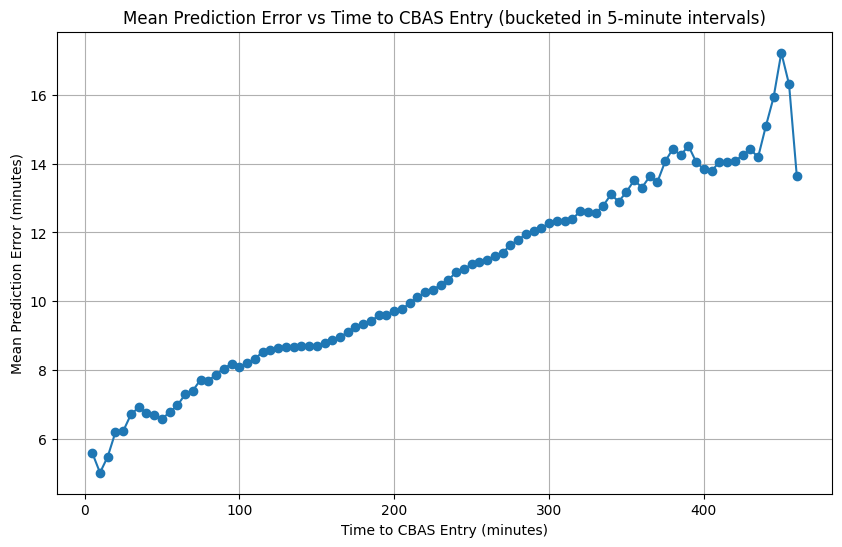

In [17]:
warnings.filterwarnings("ignore", category=UserWarning)
from tqdm import tqdm
from lstm import LSTMRollingForecaster
from collections import defaultdict
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=UserWarning)

# Initialize variables
ap = []
target_length = 61  # Target length for each error array
start_idx, end_idx = -10000, -9000  # Define your index range as variables5
# start_idx, end_idx = 16000, 16500  # Define your index range as variables

# Debug: Print initial data for checking
print(f'Non-zero indices in y_r: {np.where(y_r == 1)[0]}')
print(f'ETOT_horizons: {ETOT_horizons}')
error_dict = {}

# Loop through the specified range in `y_r`
for fnr in tqdm(np.where((y_r <= 120))[0][start_idx:end_idx]):
    # Create rolling forecaster instance
    # print(f'{fnr=}')
    recursive = LSTMRollingForecaster(best_model, data_prep, X_real[fnr], ETOT_horizons)
    pred = recursive.rolling_forecast()
    # print(f'{pred=}')
    # Calculate absolute error per timestep
    absolute_error_per_timestep = np.abs(pred[-target_length:] - y_r[fnr])[::-1]
    
    clabel = [x.astype('timedelta64[s]').astype(int) / 60 for x in cbaslabels[fnr] if not np.isnat(x)][-target_length:][::-1]
    # print(f'{len(clabel)=} {clabel}')
    # print(f'{len(absolute_error_per_timestep)=} {absolute_error_per_timestep}')
    if len(absolute_error_per_timestep) > len(clabel):
        # print(f'{fnr=} {len(absolute_error_per_timestep)=} { len(clabel)=}')
        absolute_error_per_timestep = absolute_error_per_timestep[-len(clabel):]
        # continue
    # Loop over the filtered `clabel` and `absolute_error_per_timestep`
    for i in range(len(absolute_error_per_timestep)):
        time_to_cbas = np.round(clabel[i],0)
        if time_to_cbas not in error_dict:
            
            error_dict[time_to_cbas] = []
        error_dict[time_to_cbas].append(absolute_error_per_timestep[i])
        # print(f'{error_dict=}')
    # break

bucketed_errors = defaultdict(list)
for time_in_seconds, errors in error_dict.items():
    time_in_minutes = time_in_seconds   # Convert seconds to minutes
    bucket = int(time_in_minutes // 5) * 5   # Group into 5-minute buckets
    bucketed_errors[bucket].extend(errors)   # Aggregate errors within the bucket

# Compute the mean error for each bucket
mean_errors_by_bucket = {bucket: np.nanmean(errors) for bucket, errors in bucketed_errors.items()}

# Sort the buckets
sorted_buckets = sorted(mean_errors_by_bucket.items())
print(f'{bucketed_errors=}')
# Extract sorted times and mean errors for plotting
times = [item[0] for item in sorted_buckets]
errors = [item[1] for item in sorted_buckets]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(times[:-10], errors[:-10], marker='o', linestyle='-')
plt.title("Mean Prediction Error vs Time to CBAS Entry (bucketed in 5-minute intervals)")
plt.xlabel("Time to CBAS Entry (minutes)")
plt.ylabel("Mean Prediction Error (minutes)")
plt.grid(True)
plt.show()


# Calculate mean absolute error (MAE) per timestep, ignoring NaNs in the calculation

Earliest Pattern: _Tmin_-300
Latest Pattern: _Tmin_0
fixed_features=           distance                ETOT  ADEP  ADES                EOBT  \
0       7536.795378 2023-03-06 16:20:00  EGCC  EHAM 2023-03-06 16:00:00   
1      14437.477905 2023-03-09 12:50:00  LSZH  EHAM 2023-03-09 12:35:00   
2      14437.477905 2023-03-19 17:30:00  LSZH  EHAM 2023-03-19 17:15:00   
3      13801.321265 2023-03-03 17:55:00  LOWW  EHAM 2023-03-03 17:45:00   
4       9977.022009 2023-03-17 16:34:00  EIDW  EHAM 2023-03-17 16:20:00   
...             ...                 ...   ...   ...                 ...   
87854   9085.158293 2024-01-22 15:45:00  EDDF  EHAM 2024-01-22 15:30:00   
87855  12922.196222 2024-01-22 14:30:00  EFHK  EHAM 2024-01-22 14:20:00   
87856   9977.022009 2024-01-22 16:40:00  EIDW  EHAM 2024-01-22 16:20:00   
87857  14982.537341 2024-01-22 14:35:00  EKCH  EHAM 2024-01-22 14:25:00   
87858   4949.190326 2024-01-22 19:30:00  EPWA  EHAM 2024-01-22 19:15:00   

                      ETA    CD

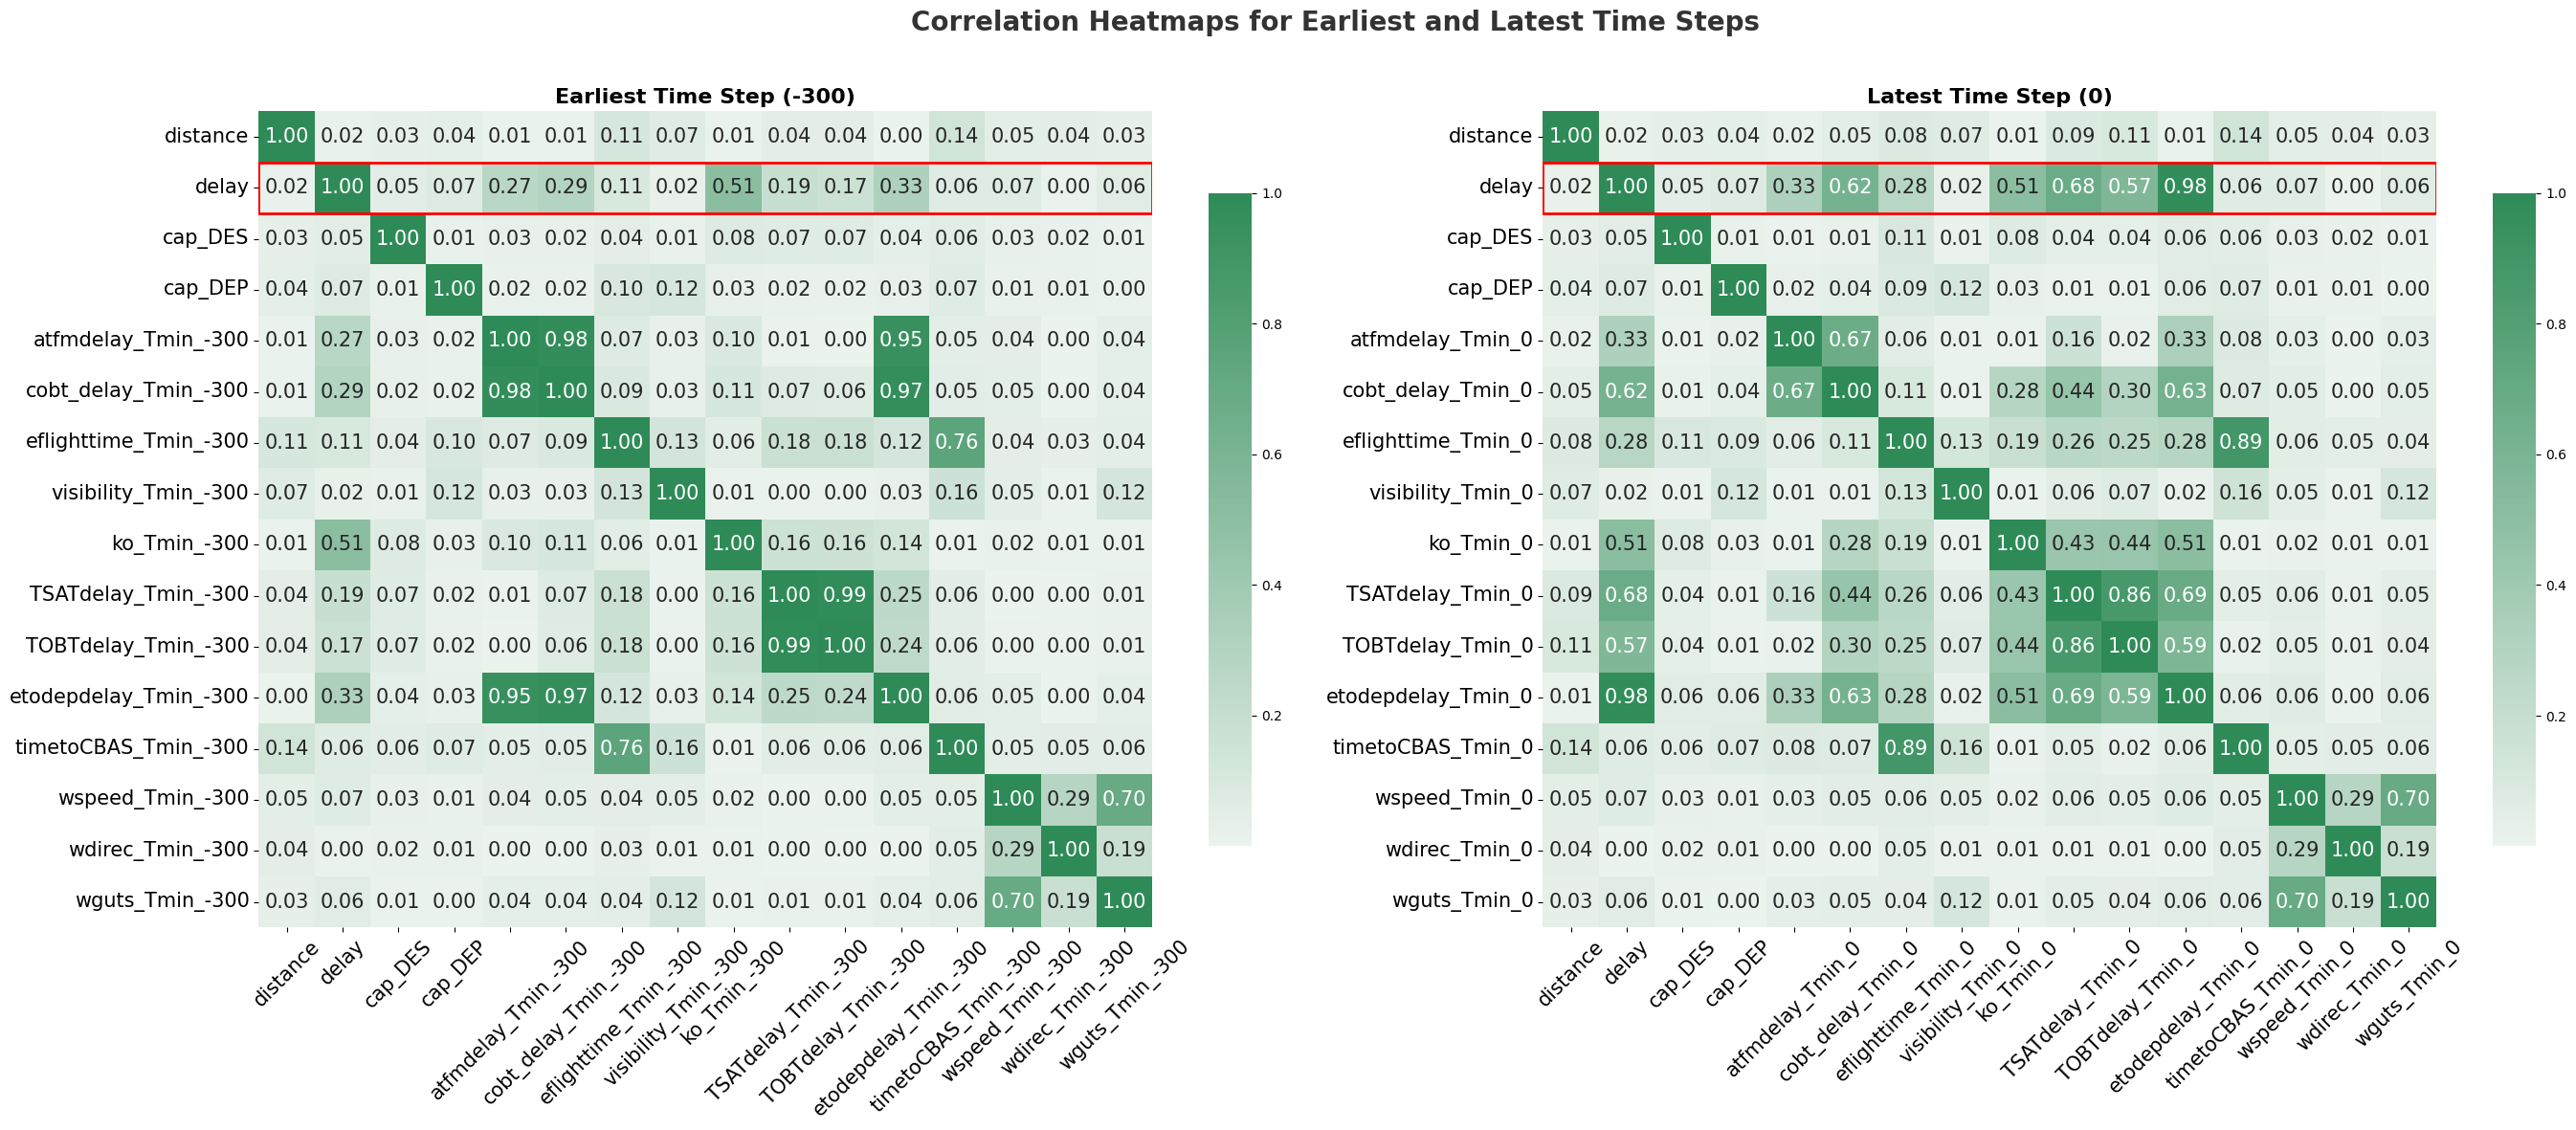

In [9]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
# Plot correlation heatmaps
plot_correlation_heatmap(extended_df, include_fixed=True)

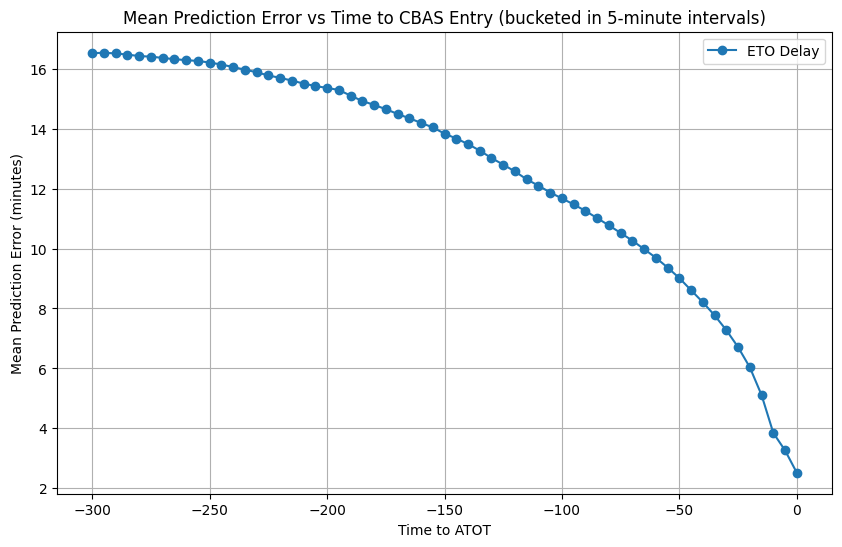

In [9]:
etodeplist = get_ETO_DEP(extended_df)

In [ ]:

bnames =data_prep.basenames
# Plot feature importance
input_size = data_prep.input_size

model_trainer = LSTMModelTrainerAttention(data_prep=data_prep, input_size=input_size, model_type='varattention')

baseline = model_trainer.compute_baseline_mae(best_model, X_test_tensor[:10000], y_test_tensor[:10000], data_prep.scaler_y, time_horizons)
imp_df = model_trainer.compute_permutation_importance(best_model, X_test_tensor[:10000], y_test_tensor[:10000], data_prep.scaler_y, time_horizons, bnames)

from sklearn.preprocessing import MinMaxScaler
def normalize_dataframe_minmax(df, feature_range=(0, 1)):
    """
    Normalize the entire DataFrame using MinMaxScaler.
    
    :param df: pandas DataFrame to normalize
    :param feature_range: tuple (min, max) desired range of transformed data
    :return: Normalized DataFrame, fitted scaler
    """
    scaler = MinMaxScaler(feature_range=feature_range)
    scaled_array = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_array, columns=df.columns, index=df.index)
    return scaled_df, scaler

impdf2, scaler = normalize_dataframe_minmax(imp_df)
model_trainer.plot_permutation_importance(impdf2)
model_trainer.plot_permutation_importance_with_highlights_interactive(imp_df, ['ko', 'visibility','etodepdelay', 'TOBTdelay', 'TSATdelay'])